In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Golden section search

The golden section search uses the following observation:

In [2]:
def golden_section_search(func, a0, b0, tol=1e-5):
    phi = (1 + np.sqrt(5)) / 2
    nit = 0
    path = []
    while abs(b0 - a0) > tol:
        a1 = a0 + ((b0 - a0) / phi)
        b1 = b0 - ((b0 - a0) / phi)
        if func(b1) < func(a1):
            b0 = a1
        else:
            a0 = b1
        nit += 1
        path.append((a0 + b0) / 2)
    
    print(f"Roots located: {(a0 + b0) / 2} with function value: {func((a0 + b0) / 2)}")
    print(f"Number of iterations until convergence: {nit}")

    return {'x': (a0 + b0) / 2,
            'f(x)': func((a0 + b0) / 2),
            'num_iter': nit,
            'path': path}

In [3]:
def plot(func, x_lim, result):
    plt.grid(True)
    x = np.linspace(x_lim[0], x_lim[1], 1000)
    y = func(x)
    plt.plot(x, y, label='sin(x)')
    
    x_path = np.array(result['path'])
    y_path = func(x_path)
    
    for i in range(len(x_path) - 1):
        plt.plot([x_path[i], x_path[i+1]], [y_path[i], y_path[i+1]], color='red')
    plt.scatter(x_path, y_path, color='red')
    
    plt.xlim(x_lim[0], x_lim[1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Golden section search')
    plt.show()

In [4]:
def rastrigin_function(x):
    return x**2 - 10 * np.cos(2 * np.pi * x) + 10

Roots located: 1.4071683973293187e-06 with function value: 3.928413150333654e-10
Number of iterations until convergence: 26


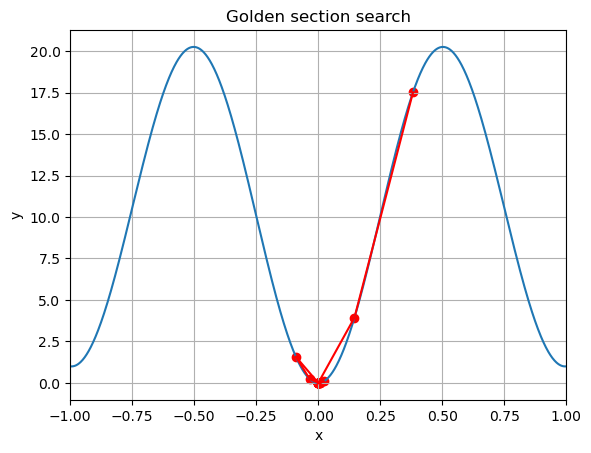

In [5]:
result = golden_section_search(rastrigin_function, -1, 1)
plot(rastrigin_function, (-1, 1), result)

In [6]:
def ackley_function(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * x**2)) - np.exp(0.5 * np.cos(2 * np.pi * x)) + 20 + np.e

Roots located: 1.4071683973431626e-06 with function value: 1.0695645378640077
Number of iterations until convergence: 26


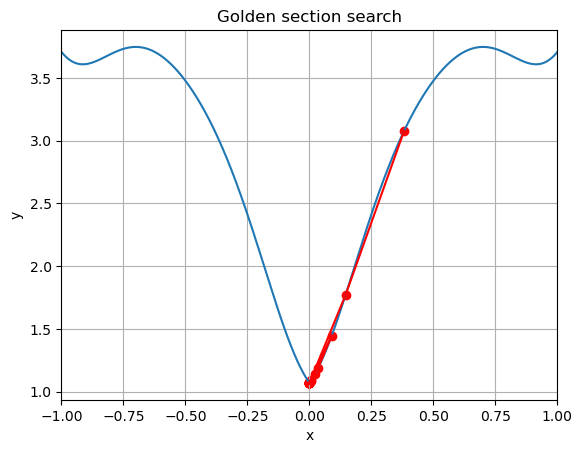

In [7]:
result = golden_section_search(ackley_function, -1, 1)
plot(ackley_function, (-1, 1), result)

Golden section search can also be used on non-unimodal functions. However, in this case, the initial search interval is important as it decides the local minimum the function will get trapped in. For example, consider the function <br>

$$f(x)=\left(7x^{5}-2x+0.1x^{2}+0.5x^{3}\right)\sin\left(x\right)$$

Which has two minimum located at $0.524$ and $-0.536$. Below we applied golden section search to the above function with different initial interval

In [8]:
def nonunimodel_function(x):
    return (7 * x**5 - 2 * x + 0.1 * x**2 + 0.5 * x**3) * np.sin(x)

Roots located: 0.5242879760390341 with function value: -0.3362668907771037
Number of iterations until convergence: 27


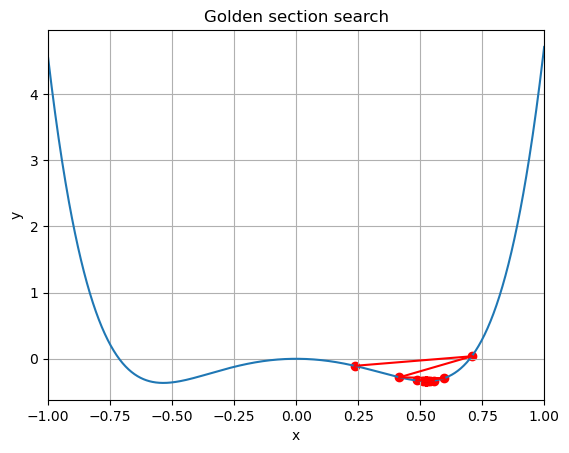

In [9]:
result = golden_section_search(nonunimodel_function, -1, 3)
plot(nonunimodel_function, (-1, 1), result)

Roots located: -0.5356195885857444 with function value: -0.3646660716369002
Number of iterations until convergence: 28


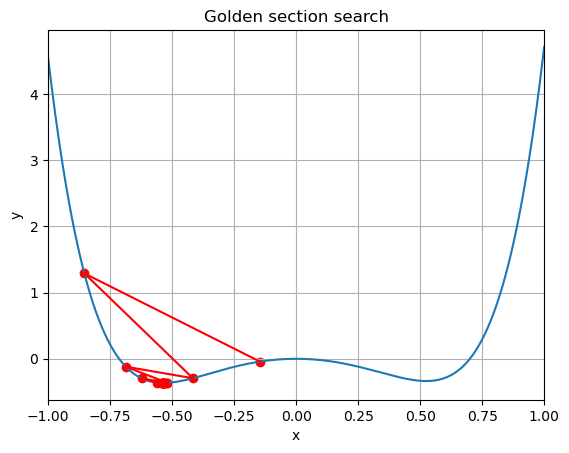

In [10]:
result = golden_section_search(nonunimodel_function, -2, 4)
plot(nonunimodel_function, (-1, 1), result)

We see that golden section search correctly identifies the local minimum in each case, taking similar number of iterations